In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Library imbalanced-learn to deal with the data imbalance. To use SMOTE oversampling
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss,confusion_matrix,classification_report,roc_curve,auc
from sklearn.metrics import precision_recall_curve

## Reading CSV Files

In [0]:
year1 = pd.read_csv("1year.csv")
year2 = pd.read_csv("2year.csv")
year3 = pd.read_csv("3year.csv")
year4 = pd.read_csv("4year.csv")
year5 = pd.read_csv("5year.csv")

/usr/local/Cellar/ipython@5/5.6.0/libexec/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (1,2,3,6,7,9,10,11,14,18,22,24,25,29,35,36,38,48,51,55,57,59) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/Cellar/ipython@5/5.6.0/libexec/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (15,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/Cellar/ipython@5/5.6.0/libexec/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (1,2,3,6,7,8,10,11,14,15,16,17,18,22,24,25,26,29,34,35,36,38,48,50,51,57,59) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Data Pre-processing

#### Removing '?'

In [0]:
years = [year1, year2, year3, year4, year5]
for i in range(len(years)):
    years[i] = years[i].replace('?', np.nan)

#### Converting data types of each columns accordingly

In [0]:
def convert_columns_type_float(dfs):
    for i in range(5):
        index = 1
        while(index<=64):
            colname = dfs[i].columns[index]
            col = getattr(dfs[i], colname)
            dfs[i][colname] = col.astype('float')
            index+=1
        colname = dfs[i].columns[65]
        col = getattr(dfs[i], colname)
        dfs[i][colname] = col.astype('category')       
    return dfs
            
years = convert_columns_type_float(years)

#### Handling Missing Values with Mean Imputation

In [0]:
def perform_mean_imputation(dfs):
    # Construct an imputer with strategy as 'mean', to mean-impute along the columns
    imputer = Imputer(missing_values= np.nan, strategy='mean', axis=0)
    mean_imputed_dfs = [pd.DataFrame(imputer.fit_transform(df)) for df in dfs]
    for i in range(len(dfs)):
        mean_imputed_dfs[i].columns = dfs[i].columns   
    return mean_imputed_dfs

years = perform_mean_imputation(years)

/usr/local/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
for i in range(5):
    print(years[i].isnull().values.any())

False
False
False
False
False


### Train Test Validation Split

In [0]:
import sklearn 
from sklearn import model_selection

year1_train, year1_test = model_selection.train_test_split(years[0], test_size = 0.20)
year1_train, year1_valid = model_selection.train_test_split(year1_train, test_size = 0.20)

year2_train, year2_test = model_selection.train_test_split(years[1], test_size = 0.20)
year2_train, year2_valid = model_selection.train_test_split(year2_train, test_size = 0.20)

year3_train, year3_test = model_selection.train_test_split(years[2], test_size = 0.20)
year3_train, year3_valid = model_selection.train_test_split(year3_train, test_size = 0.20)

year4_train, year4_test = model_selection.train_test_split(years[3], test_size = 0.20)
year4_train, year4_valid = model_selection.train_test_split(year4_train, test_size = 0.20)

year5_train, year5_test = model_selection.train_test_split(years[4], test_size = 0.20)
year5_train, year5_valid = model_selection.train_test_split(year5_train, test_size = 0.20)

In [0]:
year1_train_ = year1_train.drop(['id'], axis = 1)
year1_train_ = pd.DataFrame(year1_train_)
year_1_target = year1_train_['class']
year_1_sans_target = year1_train_.drop(['class'], axis = 1)

year2_train_ = year2_train.drop(['id'], axis = 1)
year2_train_ = pd.DataFrame(year2_train_)
year_2_target = year2_train_['class']
year_2_sans_target = year2_train_.drop(['class'], axis = 1)

year3_train_ = year3_train.drop(['id'], axis = 1)
year3_train_ = pd.DataFrame(year3_train_)
year_3_target = year3_train_['class']
year_3_sans_target = year3_train_.drop(['class'], axis = 1)

year4_train_ = year4_train.drop(['id'], axis = 1)
year4_train_ = pd.DataFrame(year4_train_)
year_4_target = year4_train_['class']
year_4_sans_target = year4_train_.drop(['class'], axis = 1)


year5_train_ = year5_train.drop(['id'], axis = 1)
year5_train_ = pd.DataFrame(year5_train_)
year_5_target = year5_train_['class']
year_5_sans_target = year5_train_.drop(['class'], axis = 1)

In [0]:
year1_test_ = year1_test.drop(['id'], axis = 1)
year1_test_ = pd.DataFrame(year1_test_)
year_1_test_target = year1_test_['class']
year_1_test_sans_target = year1_test_.drop(['class'], axis = 1)

year2_test_ = year2_test.drop(['id'], axis = 1)
year2_test_ = pd.DataFrame(year2_test_)
year_2_test_target = year2_test_['class']
year_2_test_sans_target = year2_test_.drop(['class'], axis = 1)

year3_test_ = year3_test.drop(['id'], axis = 1)
year3_test_ = pd.DataFrame(year3_test_)
year_3_test_target = year3_test_['class']
year_3_test_sans_target = year3_test_.drop(['class'], axis = 1)

year4_test_ = year4_test.drop(['id'], axis = 1)
year4_test_ = pd.DataFrame(year1_test_)
year_4_test_target = year4_test_['class']
year_4_test_sans_target = year4_test_.drop(['class'], axis = 1)

year5_test_ = year5_test.drop(['id'], axis = 1)
year5_test_ = pd.DataFrame(year5_test_)
year_5_test_target = year5_test_['class']
year_5_test_sans_target = year5_test_.drop(['class'], axis = 1)



In [0]:
def correlationPairs(df):
    corr_matrix = year_1_sans_target.corr().abs()
    #the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
    sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
    correlationSet = []
    for i in range(100):
        correlationSet1.append(sol[[i]])
    return correlationSet   


In [0]:
corr_matrix1 = year_1_sans_target.corr().abs()
corr_matrix2 = year_2_sans_target.corr().abs()
corr_matrix3 = year_3_sans_target.corr().abs()
corr_matrix4 = year_4_sans_target.corr().abs()
corr_matrix5 = year_5_sans_target.corr().abs()

In [0]:
sol1 = (corr_matrix1.where(np.triu(np.ones(corr_matrix1.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))
sol2 = (corr_matrix2.where(np.triu(np.ones(corr_matrix2.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))

sol3 = (corr_matrix3.where(np.triu(np.ones(corr_matrix3.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))

sol4 = (corr_matrix4.where(np.triu(np.ones(corr_matrix4.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))

sol5 = (corr_matrix5.where(np.triu(np.ones(corr_matrix5.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))



In [0]:
correlationSet5 = []
for i in range(len(sol5)):
    correlationSet5.append(sol5[[i]])
correlationSet5

[Attr7  Attr14    1.0
 dtype: float64, Attr14  Attr18    1.0
 dtype: float64, Attr7  Attr18    1.0
 dtype: float64, Attr1  Attr18    0.999989
 dtype: float64, Attr1  Attr14    0.999989
 dtype: float64, Attr1  Attr7    0.999989
 dtype: float64, Attr8  Attr17    0.99998
 dtype: float64, Attr11  Attr18    0.999979
 dtype: float64, Attr11  Attr14    0.999979
 dtype: float64, Attr7  Attr11    0.999979
 dtype: float64, Attr1  Attr11    0.99997
 dtype: float64, Attr16  Attr26    0.999963
 dtype: float64, Attr45  Attr60    0.999957
 dtype: float64, Attr19  Attr23    0.999934
 dtype: float64, Attr22  Attr35    0.999865
 dtype: float64, Attr4  Attr46    0.999851
 dtype: float64, Attr13  Attr19    0.999758
 dtype: float64, Attr13  Attr23    0.999692
 dtype: float64, Attr22  Attr48    0.999633
 dtype: float64, Attr35  Attr48    0.999553
 dtype: float64, Attr42  Attr49    0.999034
 dtype: float64, Attr10  Attr38    0.998613
 dtype: float64, Attr33  Attr63    0.998094
 dtype: float64, Attr4  Attr40 

### Naive Bayes: Before dropping correlated variables

In [0]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb1 = gnb.fit(year_1_sans_target, year_1_target)
gnb2 = gnb.fit(year_2_sans_target, year_2_target)
gnb3 = gnb.fit(year_3_sans_target, year_3_target)
gnb4 = gnb.fit(year_4_sans_target, year_4_target)
gnb5 = gnb.fit(year_5_sans_target, year_5_target)

In [0]:
year1_pred = gnb1.fit(year_1_sans_target, year_1_target).predict(year_1_test_sans_target)

In [0]:
 from sklearn.metrics import precision_recall_fscore_support

In [0]:
#precision, recall, F-measure and support 
year_1_target = year1_train_['class']
year_1_sans_target #The support is the number of occurrences of each class in y_true.

vals = precision_recall_fscore_support(year1_pred, year_1_test_target)

In [0]:
# Compute precision, recall, F-measure and support for each class
vals

(array([0.04415011, 0.95744681]),
 array([0.96774194, 0.03348214]),
 array([0.08444757, 0.06470165]),
 array([  62, 1344]))

### Naive Bayes: After Dropping the Correlated Variables

In [0]:
for i in range(5):
    years[i] = years[i].drop(['Attr19', 'Attr20','Attr23', 
                             'Attr30','Attr31','Attr39', 
                             'Attr42','Attr43','Attr44', 
                             'Attr49','Attr56','Attr58','Attr62'], axis=1)
    
year1_train, year1_test = model_selection.train_test_split(years[0], test_size = 0.20)
year1_train, year1_valid = model_selection.train_test_split(year1_train, test_size = 0.20)

year2_train, year2_test = model_selection.train_test_split(years[1], test_size = 0.20)
year2_train, year2_valid = model_selection.train_test_split(year2_train, test_size = 0.20)

year3_train, year3_test = model_selection.train_test_split(years[2], test_size = 0.20)
year3_train, year3_valid = model_selection.train_test_split(year3_train, test_size = 0.20)

year4_train, year4_test = model_selection.train_test_split(years[3], test_size = 0.20)
year4_train, year4_valid = model_selection.train_test_split(year4_train, test_size = 0.20)

year5_train, year5_test = model_selection.train_test_split(years[4], test_size = 0.20)
year5_train, year5_valid = model_selection.train_test_split(year5_train, test_size = 0.20)



year1_train_ = year1_train.drop(['id'], axis = 1)
year1_train_ = pd.DataFrame(year1_train_)
year_1_target = year1_train_['class']
year_1_sans_target = year1_train_.drop(['class'], axis = 1)

year2_train_ = year2_train.drop(['id'], axis = 1)
year2_train_ = pd.DataFrame(year2_train_)
year_2_target = year2_train_['class']
year_2_sans_target = year2_train_.drop(['class'], axis = 1)

year3_train_ = year3_train.drop(['id'], axis = 1)
year3_train_ = pd.DataFrame(year3_train_)
year_3_target = year3_train_['class']
year_3_sans_target = year3_train_.drop(['class'], axis = 1)

year4_train_ = year4_train.drop(['id'], axis = 1)
year4_train_ = pd.DataFrame(year4_train_)
year_4_target = year4_train_['class']
year_4_sans_target = year4_train_.drop(['class'], axis = 1)


year5_train_ = year5_train.drop(['id'], axis = 1)
year5_train_ = pd.DataFrame(year5_train_)
year_5_target = year5_train_['class']
year_5_sans_target = year5_train_.drop(['class'], axis = 1)



year1_test_ = year1_test.drop(['id'], axis = 1)
year1_test_ = pd.DataFrame(year1_test_)
year_1_test_target = year1_test_['class']
year_1_test_sans_target = year1_test_.drop(['class'], axis = 1)

year2_test_ = year2_test.drop(['id'], axis = 1)
year2_test_ = pd.DataFrame(year2_test_)
year_2_test_target = year2_test_['class']
year_2_test_sans_target = year2_test_.drop(['class'], axis = 1)

year3_test_ = year3_test.drop(['id'], axis = 1)
year3_test_ = pd.DataFrame(year3_test_)
year_3_test_target = year3_test_['class']
year_3_test_sans_target = year3_test_.drop(['class'], axis = 1)

year4_test_ = year4_test.drop(['id'], axis = 1)
year4_test_ = pd.DataFrame(year1_test_)
year_4_test_target = year4_test_['class']
year_4_test_sans_target = year4_test_.drop(['class'], axis = 1)

year5_test_ = year5_test.drop(['id'], axis = 1)
year5_test_ = pd.DataFrame(year5_test_)
year_5_test_target = year5_test_['class']
year_5_test_sans_target = year5_test_.drop(['class'], axis = 1)


In [0]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb1 = gnb.fit(year_1_sans_target, year_1_target)
gnb2 = gnb.fit(year_2_sans_target, year_2_target)
gnb3 = gnb.fit(year_3_sans_target, year_3_target)
gnb4 = gnb.fit(year_4_sans_target, year_4_target)
gnb5 = gnb.fit(year_5_sans_target, year_5_target)

In [0]:
year1_pred = gnb1.fit(year_1_sans_target, year_1_target).predict(year_1_test_sans_target)

#precision, recall, F-measure and support 
year_1_target = year1_train_['class']
year_1_sans_target #The support is the number of occurrences of each class in y_true.

vals = precision_recall_fscore_support(year1_pred, year_1_test_target)

# Compute precision, recall, F-measure and support for each class
vals

(array([0.07914201, 0.90740741]),
 array([0.95535714, 0.03786708]),
 array([0.14617486, 0.0727003 ]),
 array([ 112, 1294]))

(array([0.03345725, 0.95081967]),
 array([0.9375    , 0.04270987]),
 array([0.06460876, 0.08174771]),
 array([  48, 1358]))

## Logistic Regression 

In [0]:
LR = LogisticRegression()
lr1 = LR.fit(year_1_sans_target, year_1_target)

lr1_year1_pred = lr1.fit(year_1_sans_target, year_1_target).predict(year_1_test_sans_target)

#precision, recall, F-measure and support 

vals = precision_recall_fscore_support(lr1_year1_pred, year_1_test_target)

# Compute precision, recall, F-measure and support for each class
vals

/usr/local/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python2.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python2.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


(array([0.99852071, 0.        ]),
 array([0.96153846, 0.        ]),
 array([0.9796807, 0.       ]),
 array([1404,    2]))

In [0]:
LR = LogisticRegression(penalty='l1', C = 0.5)
lr1 = LR.fit(year_1_sans_target, year_1_target)
lr1_year1_pred = lr1.fit(year_1_sans_target, year_1_target).predict(year_1_test_sans_target)

#precision, recall, F-measure and support 

vals = precision_recall_fscore_support(lr1_year1_pred, year_1_test_target)

# Compute precision, recall, F-measure and support for each class
vals

(array([0.99926036, 0.03703704]),
 array([0.96293656, 0.66666667]),
 array([0.98076225, 0.07017544]),
 array([1403,    3]))

In [0]:
print classification_report(year_1_test_target, lr1_year1_pred)

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1352
         1.0       0.67      0.04      0.07        54

   micro avg       0.96      0.96      0.96      1406
   macro avg       0.81      0.52      0.53      1406
weighted avg       0.95      0.96      0.95      1406



## Nearest Shrunken Centroid Classifier

In [0]:
from sklearn.neighbors import NearestCentroid

### without any shrinkage

In [0]:
nsc = NearestCentroid()
nsc1 = nsc.fit(year_1_sans_target, year_1_target)
nsc_preds = nsc1.predict(year_1_test_sans_target)

In [0]:
score = nsc1.score(year_1_test_sans_target, year_1_test_target)
print score

0.3662873399715505


### With varying degrees of shrinkage

In [0]:
def shrinkageNSC(shrinkage_thresholds, trainX, trainY, testX, testY):
    for t in shrinkage_thresholds:
        nsc = NearestCentroid(shrink_threshold = t )
        model = nsc.fit(trainX, trainY)
        score = model.score(testX,testY)
        scores.append(score)
        print 'Shrinkage: ', t, ' Accuracy: ', score
    return scores


In [0]:
shrinkage_thresholds = [0, 0.01, 0.1, 0.2, 0.5, 0.8, 0.9, 1, 5, 10, 15, 20]
scores = []
scores = shrinkageNSC(shrinkage_thresholds, year_1_sans_target, year_1_target, year_1_test_sans_target, year_1_test_target)

Shrinkage:  0  Accuracy:  0.3662873399715505
Shrinkage:  0.01  Accuracy:  0.36415362731152207
Shrinkage:  0.1  Accuracy:  0.3435277382645804
Shrinkage:  0.2  Accuracy:  0.31721194879089615
Shrinkage:  0.5  Accuracy:  0.2716927453769559
Shrinkage:  0.8  Accuracy:  0.23399715504978663
Shrinkage:  0.9  Accuracy:  0.23044096728307253
Shrinkage:  1  Accuracy:  0.22617354196301565
Shrinkage:  5  Accuracy:  0.9615931721194879
Shrinkage:  10  Accuracy:  0.9615931721194879
Shrinkage:  15  Accuracy:  0.9615931721194879
Shrinkage:  20  Accuracy:  0.9615931721194879


In [0]:
print shrinkage_thresholds

[0, 0.01, 0.1, 0.2, 0.5, 0.8, 0.9, 1, 5, 10, 15, 20]


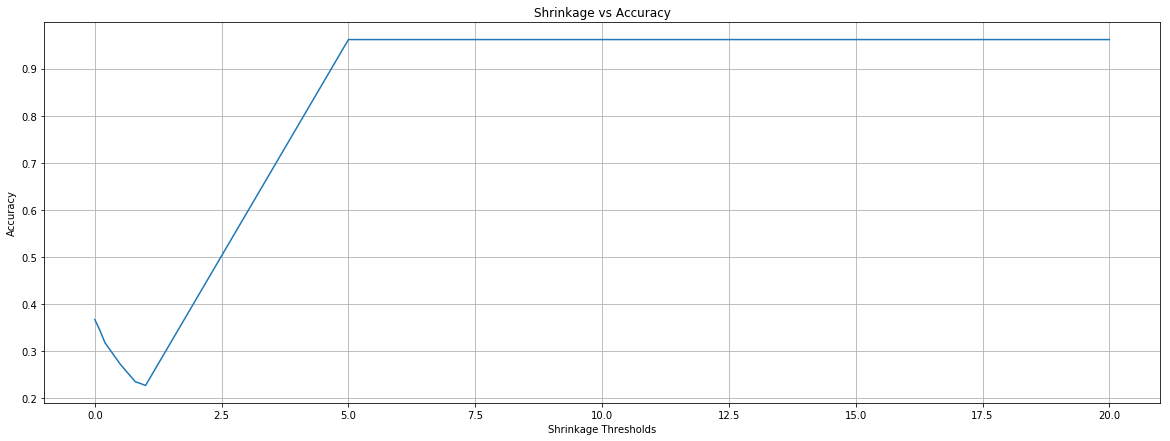

In [0]:
plt.figure(figsize=(20,7))
plt.plot(shrinkage_thresholds, scores, )
plt.grid(True)
plt.title("Shrinkage vs Accuracy")
plt.xlabel('Shrinkage Thresholds')
plt.ylabel('Accuracy')
plt.show()

## Support Vector Machines 

In [0]:
from sklearn import svm

In [0]:
'''
    kernel : string, optional (default='rbf')
 |      Specifies the kernel type to be used in the algorithm.
 |      It must be one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' or
 |      a callable.
 |      If none is given, 'rbf' will be used. If a callable is given it is
 |      used to pre-compute the kernel matrix from data matrices; that matrix
 |      should be an array of shape ``(n_samples, n_samples)``.
 |  
 |  degree : int, optional (default=3)
 |      Degree of the polynomial kernel function ('poly').
 |      Ignored by all other kernels.
 
 '''

"\n    kernel : string, optional (default='rbf')\n |      Specifies the kernel type to be used in the algorithm.\n |      It must be one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' or\n |      a callable.\n |      If none is given, 'rbf' will be used. If a callable is given it is\n |      used to pre-compute the kernel matrix from data matrices; that matrix\n |      should be an array of shape ``(n_samples, n_samples)``.\n |  \n |  degree : int, optional (default=3)\n |      Degree of the polynomial kernel function ('poly').\n |      Ignored by all other kernels.\n \n "

#### With Linear Kernel

In [0]:
svc = svm.SVC(kernel = 'linear')
scores_linear = []  

In [0]:
svc_1 = svc.fit(year_1_sans_target, year_1_target)
scores_linear[0] = svc1.score(year_1_test_sans_target, year_1_test_target)
print scores_linear[0]

#### With Polynomial Kernel

In [0]:
degrees = [2,3,4]

In [0]:
for d in degrees:
    svc = svm.SVC(kernel = 'poly', degrees = d)
    svc_1 = svc.fit(year_1_sans_target, year_1_target)
    scores_poly = svc1.score(year_1_test_sans_target, year_1_test_target)
    print 'degree: ', d, ' score: ', scores_poly